In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # type: ignore
iris_df['target'] = iris.target #type: ignore
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0)
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
iris_df['cluster'] = kmeans.labels_
iris_df.groupby(['target', 'cluster']).agg({'sepal length (cm)':'count'})

sepal length (cm)
target cluster                   
0      1                       50
1      0                       47
       2                        3
2      0                       14
       2                       36

In [5]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_res = pca.fit_transform(iris.data)
iris_df['X'] = pca_res[:,0]
iris_df['Y'] = pca_res[:,1]
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  cluster         X         Y  
0       0        1 -2.684126  0.319397  
1       0        1 -2.714142 -0.177001  
2       0        1 -2.888991 -0.144949  
3       0        1 -2.745343 -0.318299  
4       0        1 -2.728717  0.326755

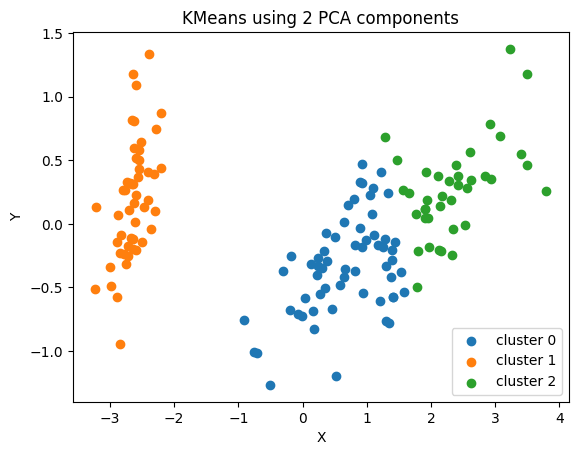

In [8]:
cluster_0 = iris_df[iris_df['cluster']==0]
cluster_1 = iris_df[iris_df['cluster']==1]
cluster_2 = iris_df[iris_df['cluster']==2]

plt.scatter(cluster_0['X'], cluster_0['Y'], label='cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label='cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], label='cluster 2')
plt.legend()
plt.title('KMeans using 2 PCA components')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('books_read.png')
plt.show()


In [7]:
plt.savefig('books_read.png')

<Figure size 640x480 with 0 Axes>